# 선형 회귀 (Linear Regression)
## 1. 개요

- 구현 내용: 선형으로 분포한 데이터를 예측하는 선형 회귀를 구현합니다.
- 코드 요약: pandas로 csv 파일을 읽어들인 뒤 sklearn의 선형 회귀 라이브러리를 활용해 선형 회귀를 구현합니다. 각각 따로 구분해두었습니다.
- 참고 자료: 학교 수업 참고자료 (서울여자대학교)
- 데이터 셋: 이 코드에 사용된 csv 파일은 키와 몸무게 정보를 가지고 있습니다. 선형회귀와 관련된 데이터가 없는 경우 공공데이터포털에서 교육부의 '학생건강검사 표본조사 rawdata'를 활용하시면 무료로 획득할 수 있습니다.
- 기타 사항: csv 파일은 레포지토리에서 제공하지 않으며 '데이터 셋'에 기재된 데이터를 획득한 후 전처리하시는 방법을 통해 가장 최신의 데이터로 실습할 수 있습니다.

## 2. 코드

### (1) sklearn.linear_model.LinearRegression 활용
[sklearn.linear_model.LinearRegression 문서 링크](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [1]:
# 데이터 처리 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 형태와 일부 값 확인
df = pd.read_csv("hw_info.csv", encoding = 'cp949', index_col = 0)
df.head(10)

,height,weight
1,158.9,52.015
2,173.6,66.910
3,174.4,66.000
4,154.0,49.275
5,177.7,69.820
6,188.3,79.479
7,183.4,75.685
8,168.7,61.569
9,185.1,76.346
10,156.5,51.694


In [3]:
# 예측에 사용할 X와 y. 내가 가진 값 X에 대한 예측 값 y를 구하는 형태로 사용. 
X = np.array(df['height'])
y = np.array(df['weight'])

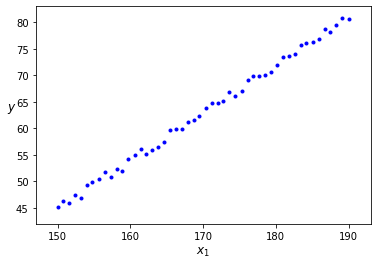

In [4]:
# 전체 데이터 시각화
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.axis([147,193,42,83])
plt.show() 

In [5]:
# 선형 회귀 라이브러리 import 및 생성
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [6]:
# 데이터 변형. reshape의 -1은 알아서 채우기 처리.
lin_reg.fit(X.reshape(-1,1),y)
# 절편과 기울기 출력
lin_reg.intercept_, lin_reg.coef_ 

(-89.97771698122781, array([0.89962835]))

In [7]:
#키 160cm(X)인 사람의 예측 몸무게(y)
lin_reg.predict([[160]])

array([53.96281868])

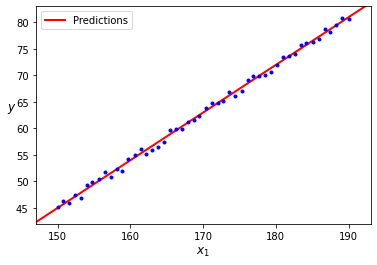

In [8]:
# 예측 결과와 학습 데이터 시각화
X_test = ([[145], [195]])
y_test = lin_reg.predict(X_test)

plt.plot(X_test, y_test, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.axis([147,193,42,83])
plt.show()